In [1]:
import pandas as pd
import seaborn as sns
from joblib import load
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from termcolor import colored

In [5]:
X_train, X_test, y_train, y_test = load('../../preprocessing/classification_data.joblib')
X_train.head()

,Belts,PersonalInjury,PropertyDamage,CommercialLicense,CommercialVehicle,Gender,VehicleType_'02 - Automobile',VehicleType_'03 - Station Wagon',VehicleType_'04 - Limousine',VehicleType_'05 - Light Duty Truck',...,Model_VN,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_OTHER,Race_WHITE,ArrestType_Marked Patrol,ArrestType_Unmarked Patrol,ViolationType_SERO,ViolationType_Warning
47831,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6309,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
34433,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,1,0
58652,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,1
51569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1


In [6]:
def report(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print(colored("Classification report for model {} on {} data".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(classification_report(y, y_pred))
    print("---------------------------------------------------------------------------------")
    
    print(colored("Confusion matrix for model {} on {} data ".format(type(model).__name__, text), "green"))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['Nije izazvao nezgodu', 'Izazvao je nezgodu'], index=['0', '1']))
    print("---------------------------------------------------------------------------------")
    

def plot_decision_tree(model, feature_names):
    plt.figure(figsize=(7, 7))
    plot_tree(model, class_names=['Nije izazvao nezgodu', 'Izazvao je nezgodu'], feature_names=feature_names, filled=True)
    plt.title("Decision tree of depth {} with {} nodes".format(model.get_depth(), model.get_n_leaves()))

    plt.show()
    print("---------------------------------------------------------------------------------")
    print(colored("Parameters of model {}".format(type(model).__name__), "green"))
    for k, v in model.get_params().items():
        print(colored(k, 'blue'), v)
    
    print("---------------------------------------------------------------------------------")

## Stablo odlučivanja

In [7]:
dtc = DecisionTreeClassifier()

In [8]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

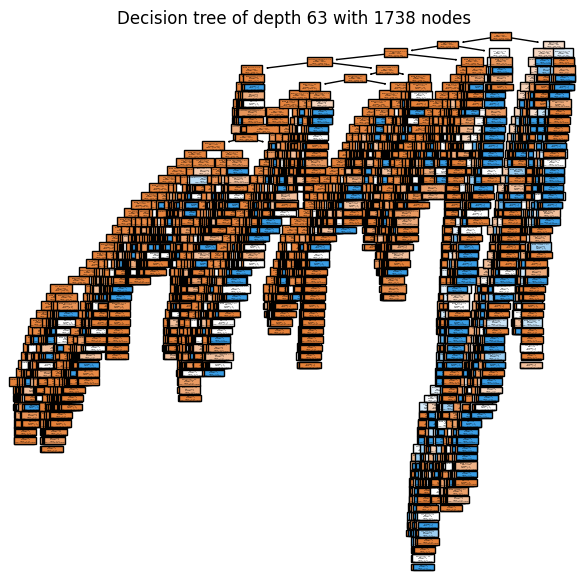

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth None
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [9]:
feature_names = X_train.columns
plot_decision_tree(dtc, feature_names)

Takođe, možemo prikazati i koji atributi su bili od najvećeg značaja prilikom formiranje stabla odlučivanja.

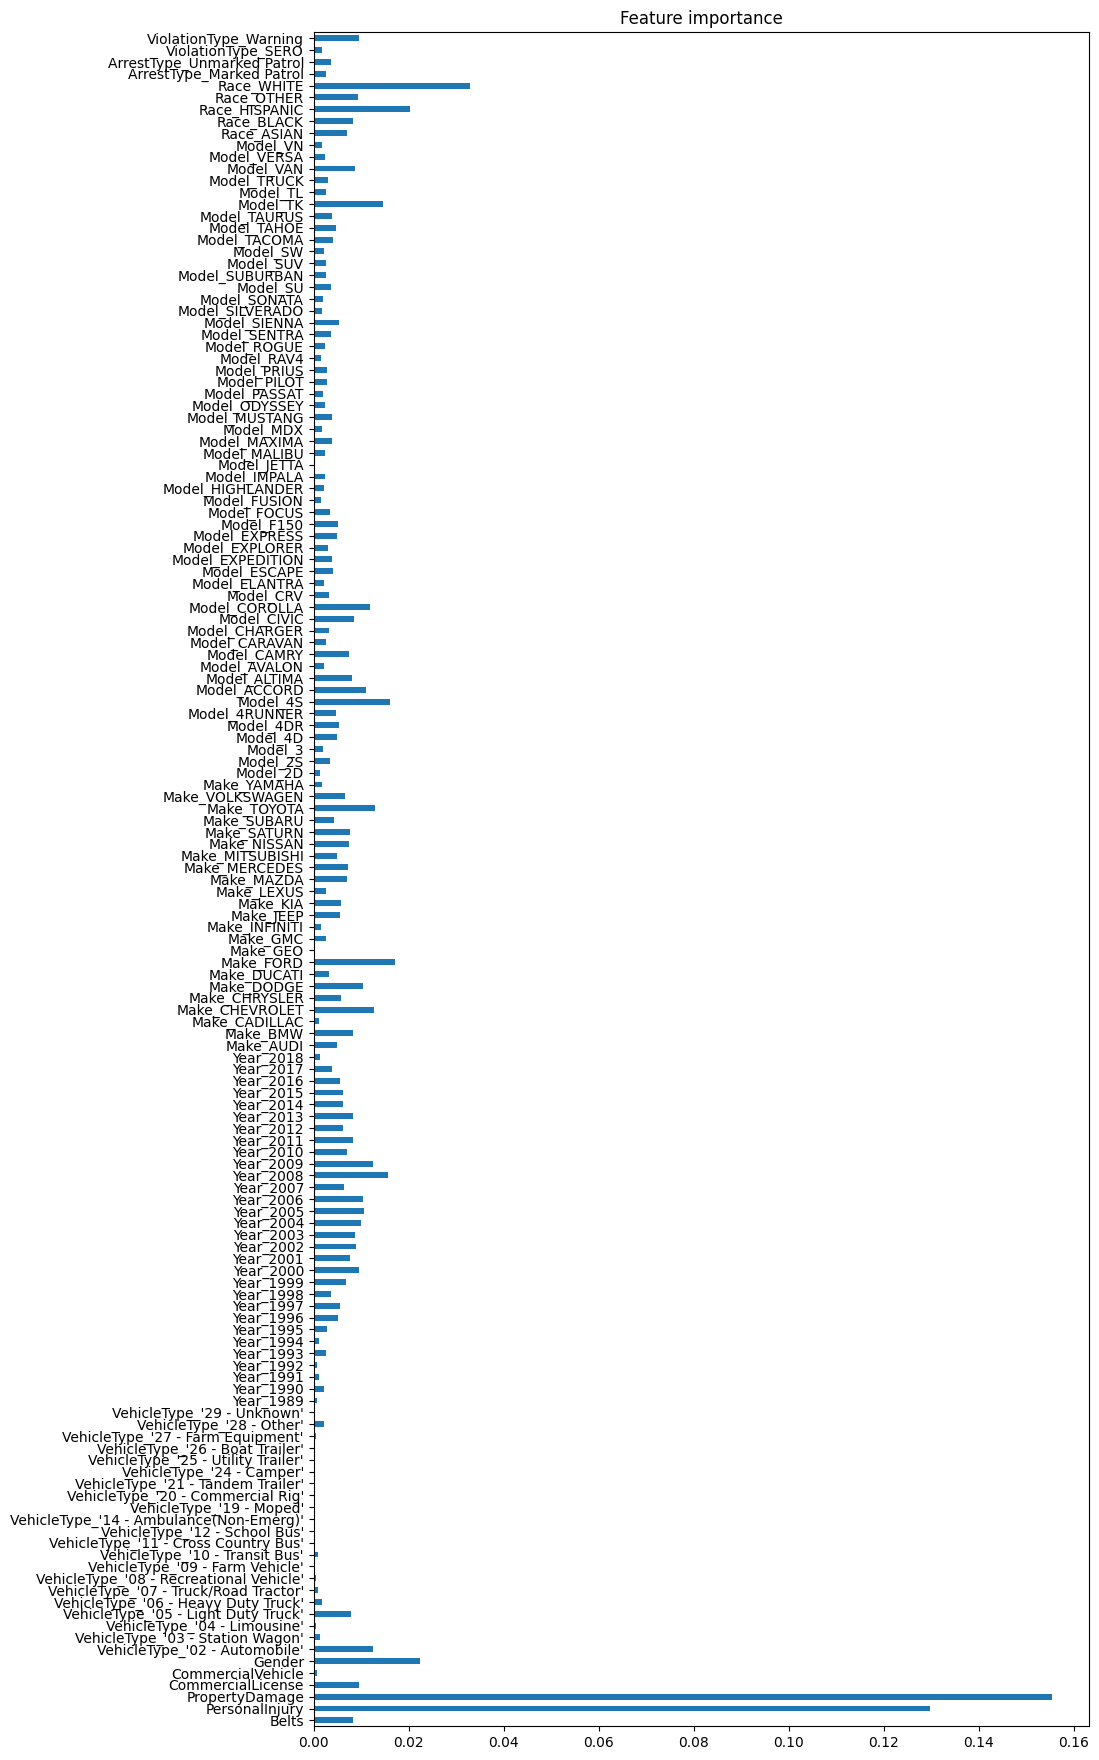

In [32]:
plt.figure(figsize=(10, 22))
pd.Series(dtc.feature_importances_, index=X_train.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [11]:
report(dtc, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47572
           1       1.00      0.83      0.91      1171

    accuracy                           1.00     48743
   macro avg       1.00      0.92      0.95     48743
weighted avg       1.00      1.00      1.00     48743

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
   Nije izazvao nezgodu  Izazvao je nezgodu
0                 47569                   3
1                   194                 977
---------------------------------------------------------------------------------


In [12]:
report(dtc, X_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20389
           1       0.36      0.30      0.33       502

    accuracy                           0.97     20891
   macro avg       0.67      0.64      0.66     20891
weighted avg       0.97      0.97      0.97     20891

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
   Nije izazvao nezgodu  Izazvao je nezgodu
0                 20129                 260
1                   353                 149
---------------------------------------------------------------------------------


Pokušaćemo da unapredimo model promenom hiper-parametara.

# Podešavanje hiper-parametara

## GridSearchCV

U mapi čuvamo informaciju o imenima i vrednostima parametara koje želimo da ispitamo.

In [13]:
params = {'criterion': ['gini', 'entropy'],
          'max_depth': [2, 4, 6, 8]
         }

In [14]:
estimator_dtc = GridSearchCV(DecisionTreeClassifier(), param_grid=params, cv=3)

In [15]:
estimator_dtc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8]})

Možemo pogledati koja je najbolja kombinacija parametara.

In [16]:
estimator_dtc.best_params_

{'criterion': 'gini', 'max_depth': 2}

Kao i najbolji score.

In [17]:
estimator_dtc.best_score_

0.9756477848816155

In [18]:
report(estimator_dtc.best_estimator_, X_train, y_train)

Classification report for model DecisionTreeClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     47572
           1       0.51      0.29      0.37      1171

    accuracy                           0.98     48743
   macro avg       0.75      0.64      0.68     48743
weighted avg       0.97      0.98      0.97     48743

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on training data 
---------------------------------------------------------------------------------
   Nije izazvao nezgodu  Izazvao je nezgodu
0                 47240                 332
1                   826                 345
---------------------------------------------------------------------------------


In [19]:
report(estimator_dtc.best_estimator_, X_test, y_test, "test")

Classification report for model DecisionTreeClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20389
           1       0.48      0.28      0.36       502

    accuracy                           0.98     20891
   macro avg       0.73      0.64      0.67     20891
weighted avg       0.97      0.98      0.97     20891

---------------------------------------------------------------------------------
Confusion matrix for model DecisionTreeClassifier on test data 
---------------------------------------------------------------------------------
   Nije izazvao nezgodu  Izazvao je nezgodu
0                 20238                 151
1                   361                 141
---------------------------------------------------------------------------------


Takođe, možemo detaljnije pogledati i rezultate cross validacije.

In [20]:
estimator_dtc.cv_results_

{'mean_fit_time': array([0.07846991, 0.11777194, 0.17678491, 0.21623166, 0.08490515,
        0.11932055, 0.1510009 , 0.18833041]),
 'std_fit_time': array([0.00904887, 0.00643535, 0.01198   , 0.00039716, 0.00135043,
        0.00802662, 0.0073748 , 0.0006238 ]),
 'mean_score_time': array([0.01440899, 0.01562945, 0.01577242, 0.01397888, 0.01296496,
        0.0154012 , 0.00521485, 0.01561832]),
 'std_score_time': array([1.73397884e-03, 5.12954062e-06, 1.37695900e-03, 8.28746670e-04,
        1.73024663e-06, 3.12125121e-04, 7.37491175e-03, 1.03008599e-06]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'entropy'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 4, 6, 8, 2, 4, 6, 8],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
            

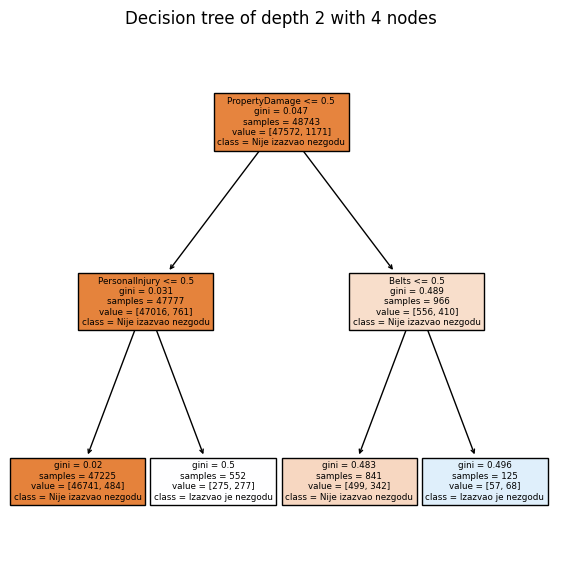

---------------------------------------------------------------------------------
Parameters of model DecisionTreeClassifier
ccp_alpha 0.0
class_weight None
criterion gini
max_depth 2
max_features None
max_leaf_nodes None
min_impurity_decrease 0.0
min_samples_leaf 1
min_samples_split 2
min_weight_fraction_leaf 0.0
random_state None
splitter best
---------------------------------------------------------------------------------


In [21]:
plot_decision_tree(estimator_dtc.best_estimator_, feature_names)

## Slučajne šume

In [22]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

report(random_forest, X_train, y_train)

report(random_forest, X_test, y_test, "test")

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47572
           1       0.98      0.85      0.91      1171

    accuracy                           1.00     48743
   macro avg       0.99      0.92      0.95     48743
weighted avg       1.00      1.00      1.00     48743

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
   Nije izazvao nezgodu  Izazvao je nezgodu
0                 47554                  18
1                   180                 991
---------------------------------------------------------------------------------
Classification report for model RandomForestClassifier on test data
-----

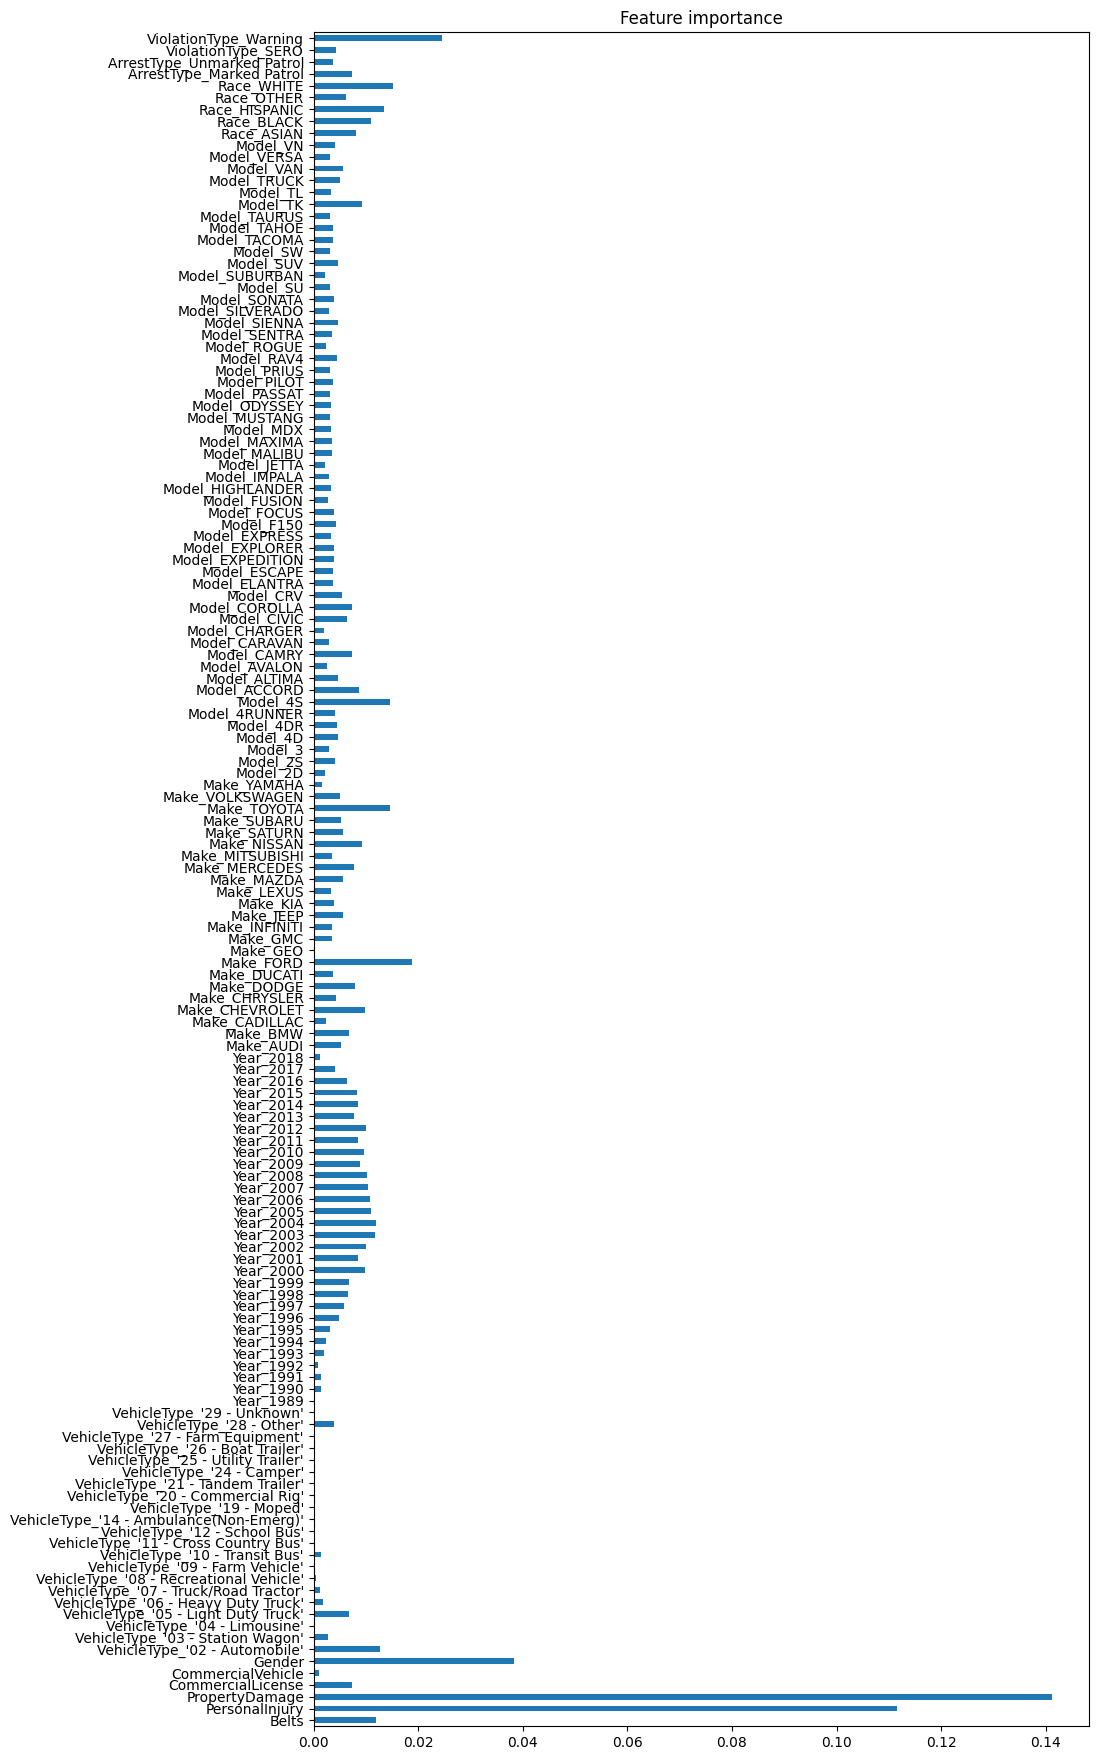

In [30]:
plt.figure(figsize=(10, 22))
pd.Series(random_forest.feature_importances_, index=X_train.columns).plot.barh()
plt.title("Feature importance")
plt.show()

In [24]:
params = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'n_estimators': [100, 150, 200]
}

estimator_rfc = GridSearchCV(RandomForestClassifier(random_state=0), param_grid=params, cv=3)

In [25]:
estimator_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [100, 150, 200]})

In [33]:
estimator_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 150}

In [34]:
estimator_rfc.best_score_

0.9741911397931475

In [35]:
report(estimator_rfc.best_estimator_, X_train, y_train)

Classification report for model RandomForestClassifier on training data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47572
           1       0.99      0.84      0.91      1171

    accuracy                           1.00     48743
   macro avg       0.99      0.92      0.95     48743
weighted avg       1.00      1.00      1.00     48743

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on training data 
---------------------------------------------------------------------------------
   Nije izazvao nezgodu  Izazvao je nezgodu
0                 47560                  12
1                   185                 986
---------------------------------------------------------------------------------


In [36]:
report(estimator_rfc.best_estimator_, X_test, y_test, "test")

Classification report for model RandomForestClassifier on test data
---------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     20389
           1       0.48      0.20      0.28       502

    accuracy                           0.98     20891
   macro avg       0.73      0.60      0.63     20891
weighted avg       0.97      0.98      0.97     20891

---------------------------------------------------------------------------------
Confusion matrix for model RandomForestClassifier on test data 
---------------------------------------------------------------------------------
   Nije izazvao nezgodu  Izazvao je nezgodu
0                 20280                 109
1                   402                 100
---------------------------------------------------------------------------------


In [37]:
estimator_rfc.cv_results_

{'mean_fit_time': array([4.08825628, 6.28198155, 8.53098718, 4.148736  , 6.3359247 ,
        8.58474755, 4.37987669, 6.80812661, 8.51149638]),
 'std_fit_time': array([0.16610511, 0.23465456, 0.32146656, 0.12867607, 0.0972344 ,
        0.44641411, 0.25058979, 0.24377363, 0.13201018]),
 'mean_score_time': array([0.30058662, 0.41772207, 0.60928178, 0.31142457, 0.46167707,
        0.62388349, 0.31677691, 0.51583346, 0.5679338 ]),
 'std_score_time': array([0.0160044 , 0.00819178, 0.04016133, 0.01176549, 0.02758485,
        0.06662582, 0.03674482, 0.02390883, 0.00368717]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'entropy', 'entropy',
                    'entropy', 'log_loss', 'log_loss', 'log_loss'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 150, 200, 100, 150, 200, 100, 150, 200],
              mask=[False, Fa

# Poređenje dobijenih modela

Napravili smo više modela, sada je pitanje koji od njih najbolje rešava problem klasifikacije. Naravno, ne možemo zaključiti samo na osnovu preciznosti modela. Za poređenje koristimo ROC krivu.

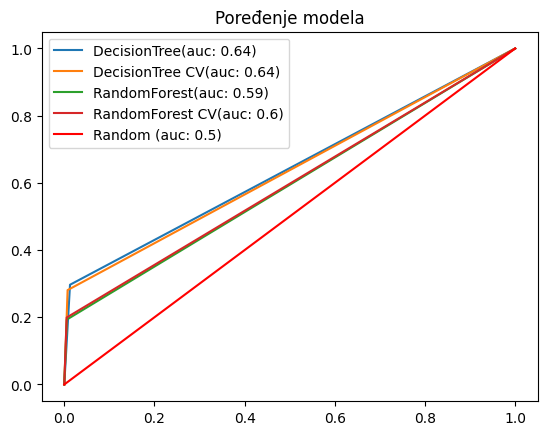

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [dtc, estimator_dtc.best_estimator_, random_forest, estimator_rfc.best_estimator_]
model_names = ['DecisionTree', 'DecisionTree CV', 'RandomForest', 'RandomForest CV']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Poređenje modela")
plt.legend()
plt.show()

Biramo model sa najvećom AUC vrednošću - DecisionTree.